In [28]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(168, 192)
[[140]
 [140]
 [140]
 ...
 [141]
 [140]
 [140]]


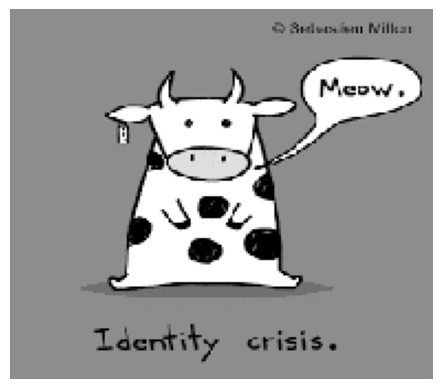

In [35]:
m = 1
n = 1
def draw_image(path):
    global m
    global n
    with open(path, 'rb') as pgmf:
        im = plt.imread(pgmf)
    print(im.shape)
    face_col = np.ndarray.flatten(im)
    face_col = np.reshape(face_col, (-1, 1))
    print(face_col)
    m = im.shape[0]
    n = im.shape[1]
    img = plt.imshow(im)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()
draw_image('./training_faces/Meow.pgm')


In [8]:
def get_column_from_pgm(photo_path):
    with open(photo_path, 'rb') as pgmf:
        im = plt.imread(pgmf)
    face_column = np.ndarray.flatten(im)
    return np.reshape(face_column, (-1, 1))

In [9]:
def get_faces_matrix(dir_with_faces):
    files = os.listdir(dir_with_faces)
    result = np.zeros(m*n)
    for filename in files:
        original_photo_path = os.path.join(dir_with_faces, filename)
        face_column = get_column_from_pgm(original_photo_path)
        result = np.column_stack((result, face_column))
    return result
get_faces_matrix('/home/beheni/UCU/second_term/LA/face-recognition/training_faces').shape

(32256, 39)

In [26]:
def convert_to_pgm(image_path, output_path):
    image = Image.open(image_path)
    resized_image = image.resize((m, n))
    grayscale_image = resized_image.convert('L')
    grayscale_image.save(output_path)   
    print(f"Image {image_path} converted and saved as {output_path}")

input_image_path = './training_faces/Meow.jpg'

output_pgm_path = './training_faces/Meow.pgm'

convert_to_pgm(input_image_path, output_pgm_path)

Image ./training_faces/ya.jpg converted and saved as ./training_faces/ya.pgm


Image ./training_faces/Meow.png converted and saved as ./training_faces/Meow.pgm
(192, 168)
[[140]
 [140]
 [140]
 ...
 [141]
 [140]
 [140]]


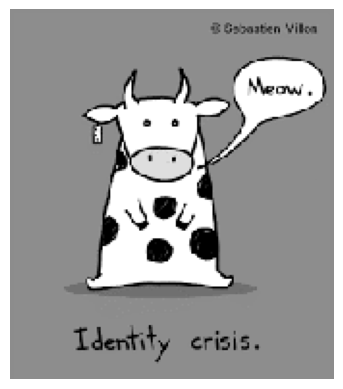

In [38]:
def get_column_from_user_file(path):
    new_extension = '.pgm'
    file_name, _ = os.path.splitext(path)
    pgm_image_path = file_name + new_extension
    convert_to_pgm(path, pgm_image_path)
    return get_column_from_pgm(pgm_image_path)
get_column_from_user_file('./training_faces/Meow.png')
draw_image('./training_faces/Meow.pgm')